In [1]:
##### Load packages #####
library(tidyverse)
library(multcomp)
library(ggplot2)
# Load CSV
graphdata <- read.csv("Coumarin Summary.csv")

# Numbering
graphdata <- graphdata %>% rename_with(~ paste0("0", seq_along(.), "_", .), everything())
print(graphdata)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




    01_DMSO  02_Maya2 03_Coumarin 04_Methylumbelliferon 05_Esculin 06_flg22
1  5125.909  64357.08    7406.245              6874.166   6046.923  1436591
2  5782.211  68222.76    7500.104              7031.320   9598.501  1513648
3  5652.584  70841.77   10955.066              6510.125   7773.102  1374392
4  6711.471 232296.08   33002.841              6388.890   8757.484  1689589
5  6184.833 204943.67   57292.600              4717.928   6275.744  1316912
6  8688.521  55949.21    5906.310              7260.146   3907.214  1753904
7  5368.644  60857.71   18592.942              5330.040   4271.197  1406011
8  5636.011 157158.73          NA              5294.100         NA       NA
9        NA        NA          NA                    NA         NA       NA
10 7693.034  90681.23   16001.083              6325.359  14103.872  8179467
11 7676.550 107374.54   29341.214              6275.843   4298.796  5762543
12 8352.022 199580.35   27857.795              6460.560   5070.797  7682959
13 5804.281 

In [2]:
## change the name also in export file
#rotate from wide table to tall table
tallcsv <- stack(graphdata)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
## Trial "One" max n: 6 // Trial "Two" max n: 6
### you can modify this "for loop" using rest of dividing 
for(i in 1:nrow(tallcsv))
  if(i%%20< 10 & i%%20 > 0){
    tallcsv[i,3] <- "One"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%20 >= 10 | i%%20 == 0){
    tallcsv[i,3] <- "Two"
  } 
print(tallcsv)

#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]
#change column location
tallcsv3 <- data.frame(tallcsv2[2],tallcsv2[1],tallcsv2[3])

#export
write.csv(tallcsv3,"Coumarin Summary_tall.csv", row.names = FALSE)


          VALUE             Treatment Trial
1      5125.909               01_DMSO   One
2      5782.211               01_DMSO   One
3      5652.584               01_DMSO   One
4      6711.471               01_DMSO   One
5      6184.833               01_DMSO   One
6      8688.521               01_DMSO   One
7      5368.644               01_DMSO   One
8      5636.011               01_DMSO   One
9            NA               01_DMSO   One
10     7693.034               01_DMSO   Two
11     7676.550               01_DMSO   Two
12     8352.022               01_DMSO   Two
13     5804.281               01_DMSO   Two
14     9857.575               01_DMSO   Two
15     3932.039               01_DMSO   Two
16     6148.871               01_DMSO   Two
17     5917.286               01_DMSO   Two
18           NA               01_DMSO   Two
19           NA               01_DMSO   Two
20           NA               01_DMSO   Two
21    64357.083              02_Maya2   One
22    68222.758              02_

In [4]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [5]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("Coumarin Summary_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))

print(head(VALUEdata))

  Treatment    VALUE Trial
1   01_DMSO 5125.909   One
2   01_DMSO 5782.211   One
3   01_DMSO 5652.584   One
4   01_DMSO 6711.471   One
5   01_DMSO 6184.833   One
6   01_DMSO 8688.521   One


[1] 87 84

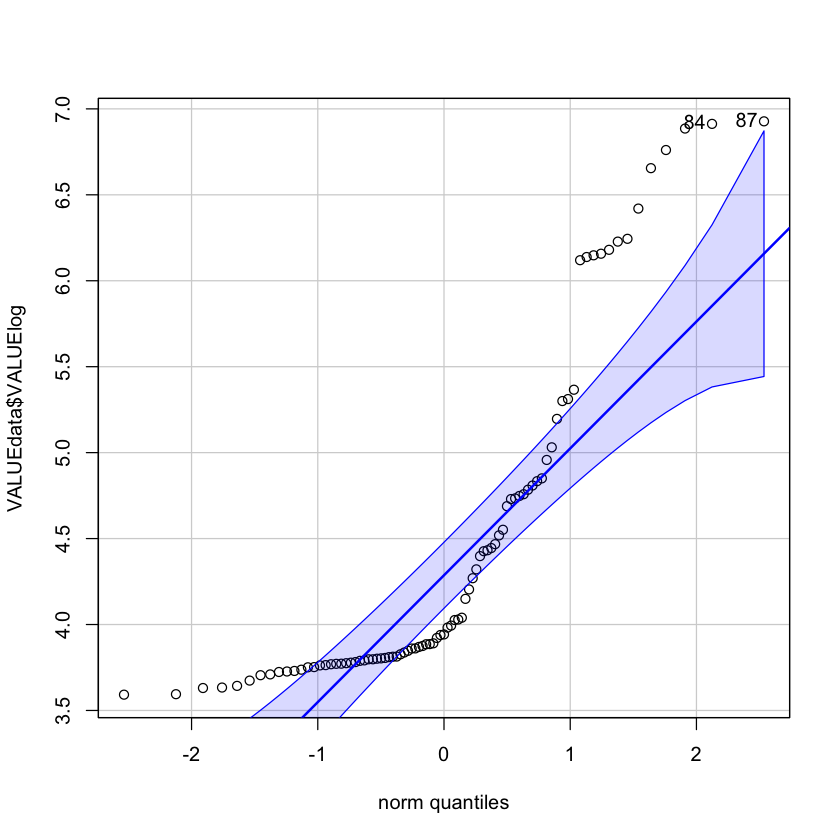

In [6]:
#Normal distribution and log converted
VALUEdata$VALUElog <- log10(VALUEdata$VALUE)
qqp(VALUEdata$VALUElog, "norm")

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


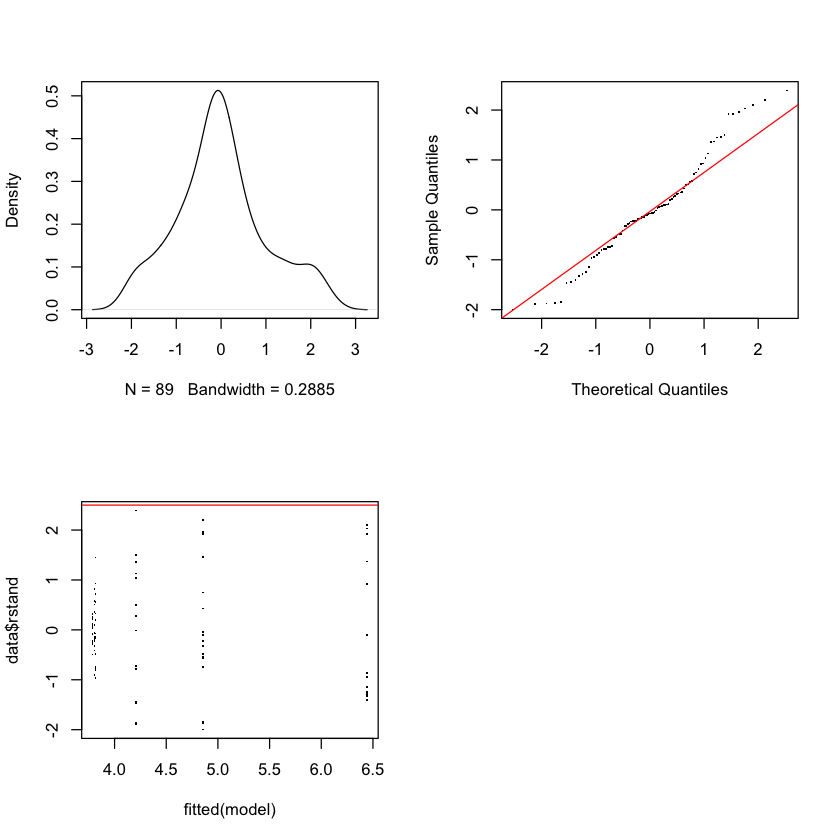

In [7]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUElog.lmm<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUElog.lmm)

In [8]:
#If the above looks good, then we can get the model characteristics
summary(VALUElog.lmm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUElog ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
     6.3     26.2      4.9     -9.7       81 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.01046 -0.56166 -0.07625  0.49857  2.40660 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept) 0.00000  0.0000  
 Residual             0.05249  0.2291  
Number of obs: 89, groups:  Trial, 2

Fixed effects:
                               Estimate Std. Error       df t value Pr(>|t|)
(Intercept)                     3.80426    0.05728 89.00000  66.421  < 2e-16
Treatment02_Maya2               1.05435    0.07980 89.00000  13.212  < 2e-16
Treatment03_Coumarin            0.40248    0.08384 89.00000   4.800 6.35e-06
Treatment04_Methylumbelliferon -0.01631    0.08234 89.00000  -0.198    0.843
Treatment05_Esculin             0.01087    0.08384 89.0

In [9]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result)
print(multcomps)
print(summary(tukey_result))

     Sum Sq         Mean Sq          NumDF       DenDF       F value   
 Min.   :74.26   Min.   :14.85   Min.   :5   Min.   :89   Min.   :283  
 1st Qu.:74.26   1st Qu.:14.85   1st Qu.:5   1st Qu.:89   1st Qu.:283  
 Median :74.26   Median :14.85   Median :5   Median :89   Median :283  
 Mean   :74.26   Mean   :14.85   Mean   :5   Mean   :89   Mean   :283  
 3rd Qu.:74.26   3rd Qu.:14.85   3rd Qu.:5   3rd Qu.:89   3rd Qu.:283  
 Max.   :74.26   Max.   :14.85   Max.   :5   Max.   :89   Max.   :283  
     Pr(>F)         
 Min.   :4.907e-53  
 1st Qu.:4.907e-53  
 Median :4.907e-53  
 Mean   :4.907e-53  
 3rd Qu.:4.907e-53  
 Max.   :4.907e-53  
              01_DMSO              02_Maya2           03_Coumarin 
                  "a"                   "b"                   "c" 
04_Methylumbelliferon            05_Esculin              06_flg22 
                  "a"                   "a"                   "d" 

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Mean